In [30]:
# conda install pydotplus
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

### Build a Decision Tree model for the iris dataset in order to predict the species of an iris flower based on the values of four numerical variables. 

#### Read in the data

In [31]:
df = pd.read_csv('../../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Explore the data

In [32]:
print(df.shape)

(150, 5)


In [33]:
# Numeric variables
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
# df[df.species=='setosa'].describe()

**Variables have roughly similar ranges of values. No missing values**

In [35]:
# Target variable
print(df.species.value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Equal numbers of each class**

[]

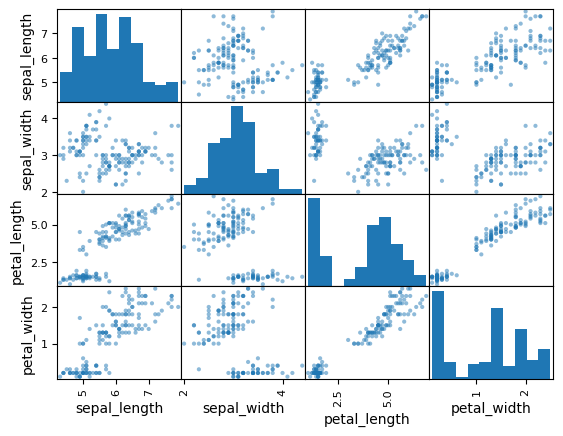

In [36]:
scatter_matrix(df)
plt.plot()

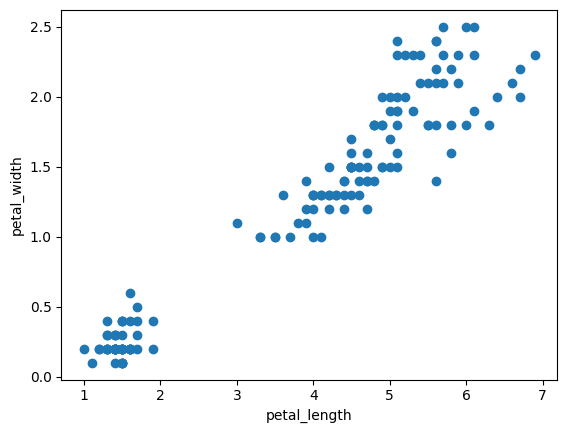

In [37]:
# Lets have a closer look at the petal_length and petal_width
plt.scatter(df.petal_length, df.petal_width)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

**Looks as if there an easy separation between one of the classes and the other two, based on petal_length and petal_width. Also with other pairs of features.**

In [38]:
# Find the sepal_length values for setosa's
d = df.to_numpy()
# print(d)
print(d[d[:,4] == "setosa", 0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0]


[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]


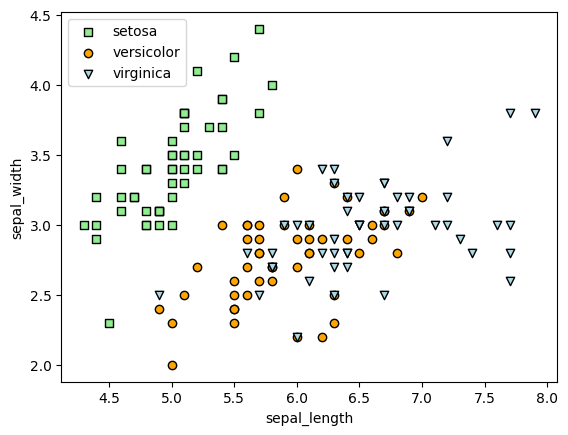

In [39]:
# sepal_length and sepal_width for each species?
print(d[d[:,4] == "virginica", 0])
d = np.array(df)
plt.scatter(
    d[d[:,4] == "setosa", 0], d[d[:,4] == "setosa", 1],
    c='lightgreen', marker='s', edgecolor='black',
    label='setosa'
)


plt.scatter(
    d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1],
    c='orange', marker='o', edgecolor='black',
    label='versicolor'
)
plt.scatter(
    d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1],
    c='lightblue', marker='v', edgecolor='black',
    label='virginica'
)

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")

plt.show()

**sepal_length and sepal_width seperates the setosa. Not so good seperating the other two.**

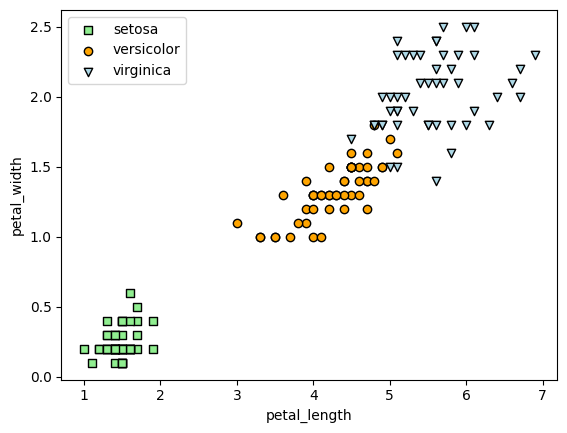

In [40]:
# Do petal_length and petal_width seperate the classes?
plt.scatter(
    d[d[:,4] == "setosa", 2], d[d[:,4] == "setosa", 3],
    c='lightgreen', marker='s', edgecolor='black',
    label='setosa'
)


plt.scatter(
    d[d[:,4] == "versicolor", 2], d[d[:,4] == "versicolor", 3],
    c='orange', marker='o', edgecolor='black',
    label='versicolor'
)
plt.scatter(
    d[d[:,4] == "virginica", 2], d[d[:,4] == "virginica", 3],
    c='lightblue', marker='v', edgecolor='black',
    label='virginica'
)

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(loc="upper left")

plt.show()

**petal_length and petal_width seem to work even better. Looks good for classification model**

### Build a model

In [41]:
X = df.drop(columns= 'species')
y = df.species
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [42]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, 
                                                    random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125, 4)
(125,)
(25, 4)
(25,)


In [43]:
# Create the decision tree
model = DecisionTreeClassifier(max_depth=4)
# model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.get_depth()

4

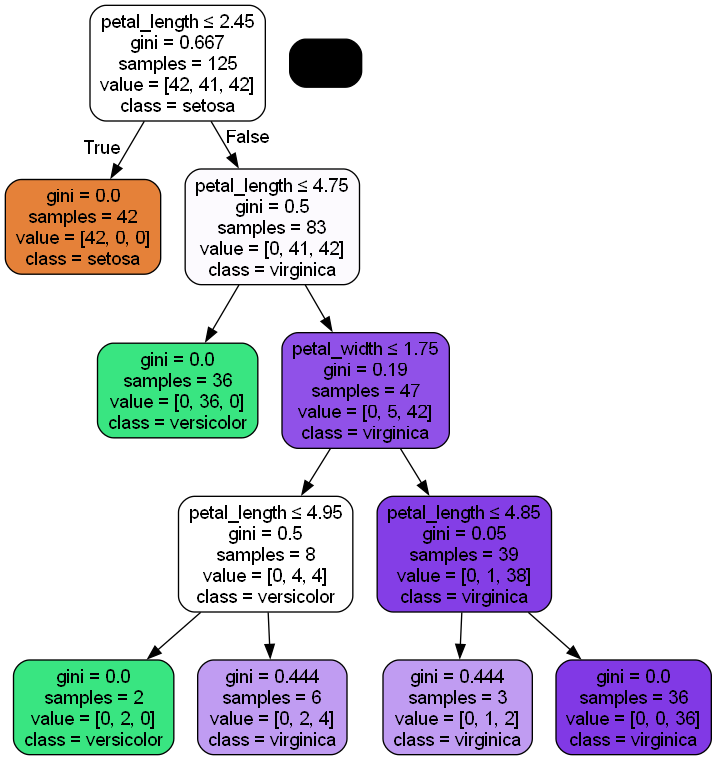

In [45]:
# Draw the tree
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('plots/iris.png')
Image(graph.create_png())

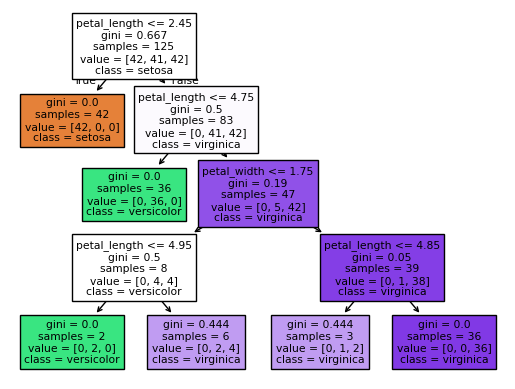

In [46]:
from sklearn.tree import plot_tree
plot_tree(model, filled=True, feature_names = feature_names, class_names = target_names)
plt.show()

### Evaluate the Model

In [18]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 0.976


In [19]:
# Test Accuracy
print("Test Accuracy:", model.score(X_test, y_test))

Test Accuracy: 0.96


In [20]:
# Get predictions
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.96


In [21]:
cm = confusion_matrix(y_test, y_hat)
# cm = confusion_matrix(y_test, y_hat, labels=['setosa', 'versicolor', 'virginica'])
print(cm)

[[8 0 0]
 [0 9 0]
 [0 1 7]]


**Note: Perfect seperation of the setosa (first row and column).
    One incorrectly classified instance, a virginica, classified as a versicolor.**